In [61]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from utils import *

In [2]:
os.getcwd()

'C:\\Users\\W.Rogers\\Phantom DataLoader'

In [3]:
base_path = r'C:\Users\W.Rogers\Desktop\Data\CCR_new'
sect_path = os.path.join(base_path, 'sections.tsv')
issu_path = os.path.join(base_path, 'issues.tsv')

In [4]:
sections  = pd.read_csv(sect_path, delimiter='\t')
sections['Sections'] = sections.Sections.apply(lambda x: x[1:-1].split(','))
sections['Sections'] = sections.Sections.apply(lambda x: [int(item.strip()) for item in x])
sections

,Group,Scan Group,Scan Identity,Res,Sections
0,1,CCR-2-B1,CCR-2-0001,205,"[16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 1..."
1,1,CCR-2-B1,CCR-2-0002,160,"[16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 1..."
2,1,CCR-2-B1,CCR-2-0003,137,"[16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 1..."
3,1,CCR-2-B1,CCR-2-0004,117,"[16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 1..."
4,1,CCR-2-B1,CCR-2-0005,102,"[16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 1..."
...,...,...,...,...,...
236,28,CCR-2-B6,CCR-2-0237,163,"[13, 14, 13, 13, 13, 14, 14, 13, 13, 14]"
237,28,CCR-2-B6,CCR-2-0238,163,"[13, 14, 13, 13, 13, 14, 14, 13, 13, 14]"
238,28,CCR-2-B6,CCR-2-0239,163,"[13, 14, 13, 13, 13, 14, 14, 13, 13, 14]"
239,28,CCR-2-B6,CCR-2-0240,163,"[13, 14, 13, 13, 13, 14, 14, 13, 13, 14]"


In [23]:
issues = pd.read_csv(issu_path, delimiter='\t')
issues['Issue Images'] = issues['Issue Images'].apply(lambda x: x[1:-1].split(','))
issues['Issue Images'] = issues['Issue Images'].apply(lambda x: [item.strip() for item in x])
issues['Issue Images'] = issues['Issue Images'].apply(lambda x: [int(item) for item in x])
issues

,Group,Scan Group,Scan Identity,Res,Issue Images
0,1,CCR-2-B1,CCR-2-0001,205,[-1]
1,1,CCR-2-B1,CCR-2-0002,160,[-1]
2,1,CCR-2-B1,CCR-2-0003,137,[160]
3,1,CCR-2-B1,CCR-2-0004,117,[160]
4,1,CCR-2-B1,CCR-2-0005,102,[160]
...,...,...,...,...,...
236,28,CCR-2-B6,CCR-2-0237,163,"[13, 27, 40, 66, 120, 134]"
237,28,CCR-2-B6,CCR-2-0238,163,"[13, 27, 40, 66, 120, 134]"
238,28,CCR-2-B6,CCR-2-0239,163,"[13, 27, 40, 66, 120, 134]"
239,28,CCR-2-B6,CCR-2-0240,163,"[13, 27, 40, 66, 120, 134]"


In [76]:
images, id = get_images(5, 35)
id

'CCR-2-0237'

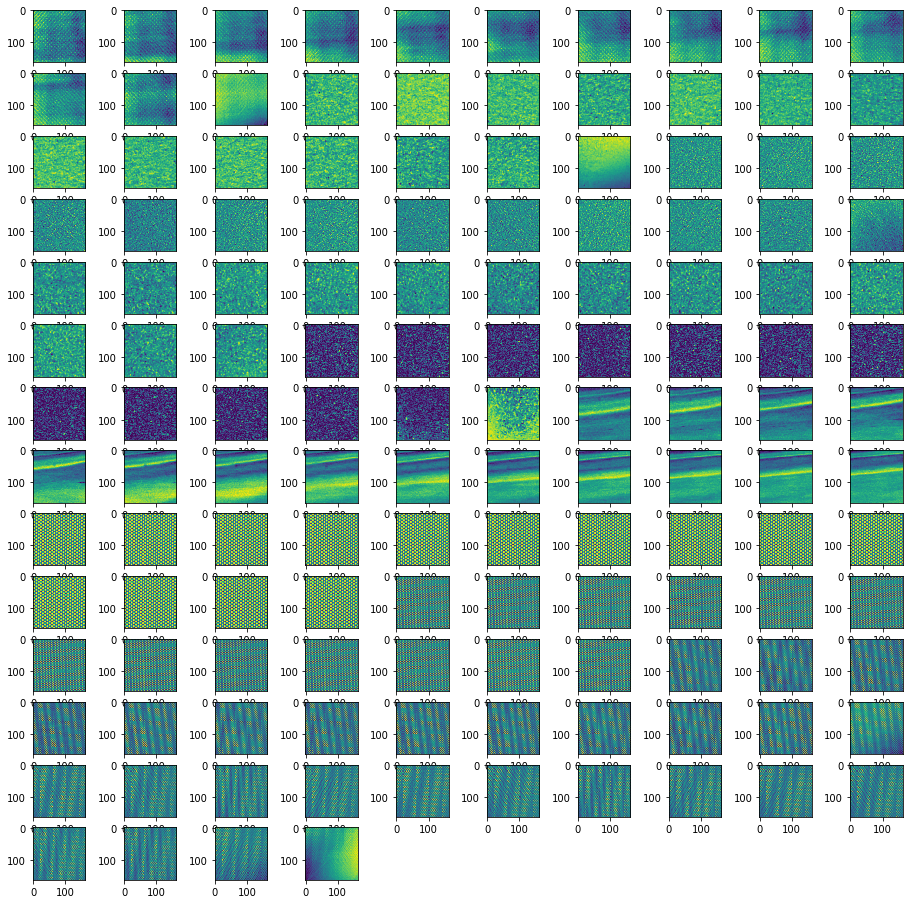

In [77]:
show_all(images, 10)

In [128]:
sec = np.asarray(sections.loc[sections['Scan Identity'] == id, 'Sections'].values[0])
iss = np.asarray(issues.loc[issues['Scan Identity'] == id, 'Issue Images'].values[0]) - 1
print(sec)
print(iss)

[13, 14, 13, 13, 13, 14, 14, 13, 13, 14]
[ 12  26  39  65 119 133]


In [162]:
stack = []
b = 0
t = sec[0]
row = np.empty((images[0].shape[:2]+(t-b,)))
row = images[:,:,b:t]
if bool(len({*iss} & {*range(b, t)})): # Check to see if there is a bad image in the group
    i = np.asarray([x for x in iss if x in range(b, t)])
    print(range(b, t), i, i-b)
    print(row.shape)
    row = np.delete(row, i-b, 2)
    print(row.shape)
stack.append(row)

for s in range(0, 9):
    b=t
    t+=sec[s+1]
    row = np.empty((images[0].shape[:2]+(t-b,)))
    row = images[:,:,b:t]
    if bool(len({*iss} & {*range(b, t)})): # Check to see if there is a bad image in the group
        i = np.asarray([x for x in iss if x in range(b, t)])
        print(range(b, t), i, i-b)
        row = np.delete(row, i[0]-b, 2)
    stack.append(row)

range(0, 13) [12] [12]
(163, 163, 13)
(163, 163, 12)
range(13, 27) [26] [13]
range(27, 40) [39] [12]
range(53, 66) [65] [12]
range(107, 120) [119] [12]
range(120, 134) [133] [13]


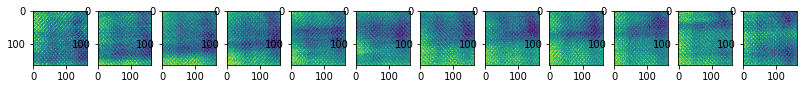

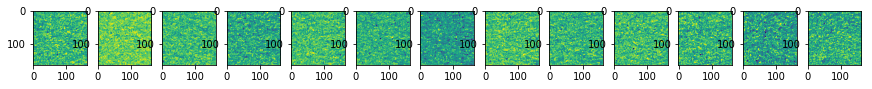

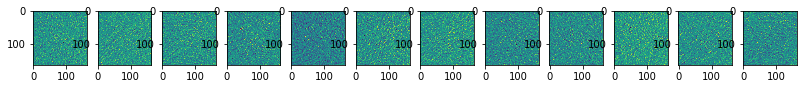

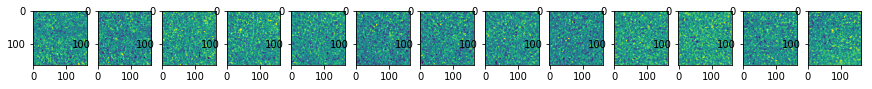

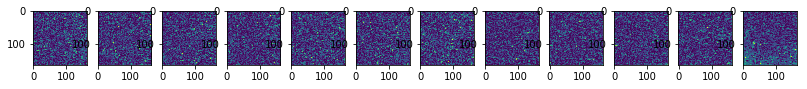

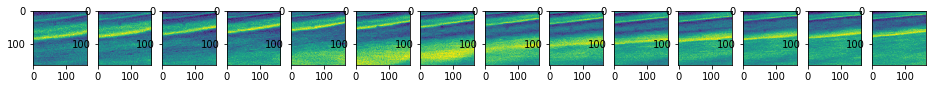

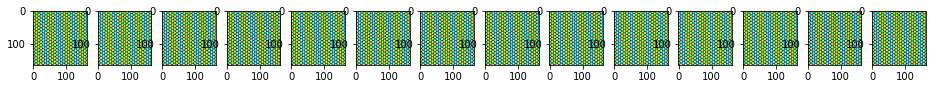

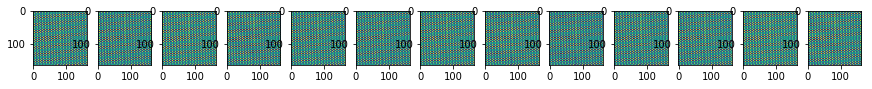

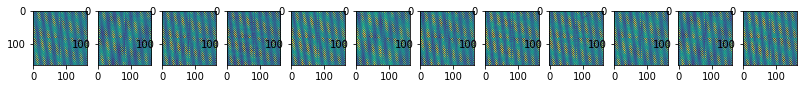

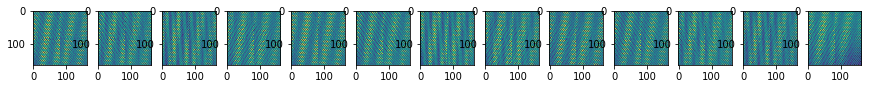

In [161]:
for x in range(10):
    show_all(stack[x], 14)